In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import nltk
from textblob import TextBlob

In [6]:
df = pd.read_excel("3class.xlsx")

In [39]:
df2 = pd.read_excel("human_ai.xlsx")

In [4]:
def calculate_metrics(df):
    """
    Calculates the average sentence length, average grammatical complexity, and average sentiment
    score for each row of text in the input DataFrame.
    
    Parameters:
        df (Pandas DataFrame): A DataFrame with a single column of text
    
    Returns:
        Pandas DataFrame: A new DataFrame with the columns 'average_sentence_length', 'average_grammatical_complexity',
        and 'average_sentiment'
    """
    # Define a function to calculate the POS tag count for a given sentence
    def pos_tag_count(sentence):
        pos_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
        tag_count = len(pos_tags)
        return tag_count
    
    # Define a function to calculate the sentiment score for a given sentence
    def sentiment_score(sentence):
        blob = TextBlob(sentence)
        score = blob.sentiment.polarity
        return score
    
    # Tokenize the text into sentences
    sentences = df['prompt'].apply(nltk.sent_tokenize)
    
    # Calculate the average sentence length for each row
    df['average_sentence_length'] = sentences.apply(lambda x: sum(len(sentence.split()) for sentence in x)/len(x))
    
    # Calculate the average POS tag count for each row
    df['average_grammatical_complexity'] = sentences.apply(lambda x: sum(pos_tag_count(sentence) for sentence in x)/len(x))
    
    # Calculate the average sentiment score for each row
    df['average_sentiment'] = sentences.apply(lambda x: sum(sentiment_score(sentence) for sentence in x)/len(x))
    
    # Drop the 'sentences' column
    #df = df.drop('sentences', axis=1)
    
    return df[['average_sentence_length', 'average_grammatical_complexity', 'average_sentiment']]


In [11]:
metrics_df = calculate_metrics(df)
df


,prompt,completion,average_sentence_length,average_grammatical_complexity,average_sentiment
0,"\n\nIn the late 1800s, a woman by the name of ...",10thgrade,18.548387,20.709677,0.248499
1,\n\nThe Hunt for Enemy Technology - Early Jets...,10thgrade,23.312500,25.812500,0.202406
2,The Division of Labour\n\nThe division of labo...,6thgrade,15.634615,17.653846,0.139460
3,\n\n“Yes the body:” A Quarantined Review of Sp...,10thgrade,19.632653,22.714286,0.096295
4,"\n\nOnce upon a time, in a world far different...",6thgrade,25.478261,27.695652,0.074657
...,...,...,...,...,...
295,\n\nThe History of Silicon Valley — A Brief Su...,6thgrade,19.793103,22.241379,0.248389
296,\n\nYes the Body: A Quarantined Review of Spaw...,6thgrade,18.302326,20.023256,0.167027
297,"\n\nAs I stand atop the Eildon Hills, overlook...",college,19.421053,21.789474,0.125174
298,"\n\nAs human beings, we have always been fasci...",10thgrade,21.387097,23.548387,0.043360


In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def generate_boxplots(dataframe, category_column):
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64'])
    category_values = ['6thgrade', '10thgrade', 'college'] # define desired order of labels
    sns.set_style("whitegrid")
    for col in numeric_cols.columns:
        fig, ax = plt.subplots(figsize=(5, 3))
        title = col.replace("_", " ").title()
        ax.set_title(title)
        boxplot_data = []
        for category_value in category_values:
            label = category_value.replace("grade", "") # remove "grade" from label
            label = label.capitalize() # capitalize first letter of label
            category_data = dataframe[dataframe[category_column] == category_value][col]
            boxplot_data.append(category_data)
        bp = ax.boxplot(boxplot_data, patch_artist=True, positions=range(len(category_values)))
        for patch in bp['boxes']:
            patch.set_facecolor('#99ccee')
        ax.set_xticks(range(len(category_values)))
        ax.set_xticklabels([label for label in category_values]) # set labels in desired order
        plt.show()


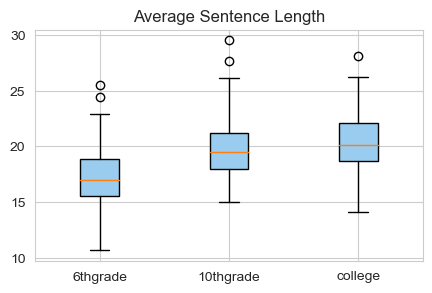

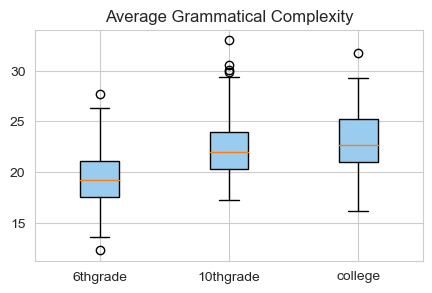

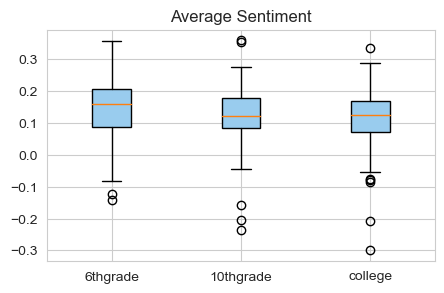

In [36]:
generate_boxplots(df, 'completion')


In [42]:
def generate_boxplots2(dataframe, category_column):
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64'])
    category_values = ['human', 'ai'] # define desired order of labels
    sns.set_style("whitegrid")
    for col in numeric_cols.columns:
        fig, ax = plt.subplots(figsize=(5, 3))
        title = col.replace("_", " ").title()
        ax.set_title(title)
        boxplot_data = []
        for category_value in category_values:
            label = category_value.replace("grade", "") # remove "grade" from label
            label = label.capitalize() # capitalize first letter of label
            category_data = dataframe[dataframe[category_column] == category_value][col]
            boxplot_data.append(category_data)
        bp = ax.boxplot(boxplot_data, patch_artist=True, positions=range(len(category_values)))
        for patch in bp['boxes']:
            patch.set_facecolor('#99ccee')
        ax.set_xticks(range(len(category_values)))
        ax.set_xticklabels([label for label in category_values]) # set labels in desired order
        plt.show()

In [40]:
metrics_df2 = calculate_metrics(df2)
df2

,prompt,completion,average_sentence_length,average_grammatical_complexity,average_sentiment
0,\n\nThe NBA is home to some of the most amazin...,ai,17.975610,20.878049,0.180748
1,Evelyn McHale’s Most Beautiful Suicide\n\nA ph...,human,16.428571,18.968254,0.107971
2,\n\nIn a world where technology has become an ...,ai,19.000000,21.638889,0.184185
3,An Analysis of the Role of Media Coverage of t...,human,39.333333,43.166667,-0.009496
4,\n\nThe Familial Blackmail Of A Popular Senato...,ai,16.292683,18.097561,0.072050
...,...,...,...,...,...
445,"\n\nIn today's ever-evolving world, communicat...",ai,20.485714,23.685714,0.084739
446,\n\nThe study of Anglo-Saxon culture and histo...,ai,23.457143,25.971429,0.093564
447,\n\nA Vacation to Mars: The Biggest Scam in Mo...,ai,21.029412,23.235294,0.024079
448,\n\nThe Winter Goddess\n\nWinter is one of the...,ai,19.828571,22.028571,0.081576


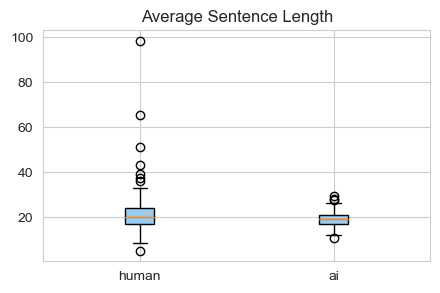

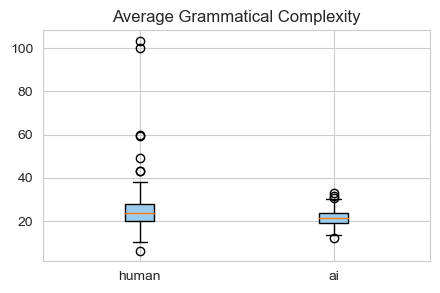

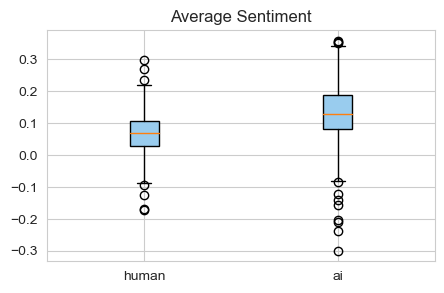

In [43]:
generate_boxplots2(df2, 'completion')

In [1]:
import scipy.stats as stats

def perform_ranksum(dataframe, category_column):
    # Create a list to hold the data for each category
    category_data = []
    for category_value in dataframe[category_column].unique():
        category_data.append(dataframe[dataframe[category_column] == category_value])

    # Extract the data from numerical columns in each category data frame
    numerical_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    data = [[df[col] for col in numerical_columns] for df in category_data]

    # Perform the rank sum test for each numerical column and category
    results = {}
    for i, col in enumerate(numerical_columns):
        groups = [cat_data[i] for cat_data in data]
        if len(groups) == 2:
            result = stats.ttest_rel(groups[0], groups[1])
        else:
            raise ValueError('ttest_rel() requires exactly 2 groups.')


    return results


In [89]:
ranksum = perform_ranksum(df, 'completion')
print(ranksum)

{'average_sentence_length': KruskalResult(statistic=65.97853700678145, pvalue=4.709152198557007e-15), 'average_grammatical_complexity': KruskalResult(statistic=68.69810600873662, pvalue=1.2089151540391812e-15), 'average_sentiment': KruskalResult(statistic=5.73027508305654, pvalue=0.056975294124061916)}


In [90]:
ranksum2 = perform_ranksum(df2, 'completion')
print(ranksum2)

{'average_sentence_length': RanksumsResult(statistic=-2.894698903905549, pvalue=0.003795223789737559), 'average_grammatical_complexity': RanksumsResult(statistic=-4.031201754210344, pvalue=5.549238204509057e-05), 'average_sentiment': RanksumsResult(statistic=7.659475569611681, pvalue=1.866938578817793e-14)}
